# **Overall rating prediction**

# 1 **Problem statement**


The goal of this project is to predict the overall rating (overall) of a soccer player using various input features. These features include physical attributes, technical skills, and player-specific characteristics such as age, height, weight, position, and more.

Data Description:
The dataset includes the following columns:

ID: Unique identifier for the player.

full_name: The full name of the player.

club: The current club or team the player belongs to.


special: A special rating indicating a player's skill level or unique attributes.

age: The player's age.

league: The league in which the player competes.

height_cm: The player's height in centimeters.

weight_kg: The player's weight in kilograms.

body_type: The body type classification of the player (e.g., slim, average, stocky).

nationality: The country the player represents.

overall: The overall rating of the player (target variable).

potential: The potential rating, predicting the player's future performance.

pac, sho, pas, dri, def, phy: Attribute ratings for pace, shooting, passing,

dribbling, defense, and physicality, respectively.

skill_moves: The number of skill moves the player can perform.

weak_foot: The rating of the player's weaker foot.

work_rate_att: The player's attacking work rate.

work_rate_def: The player's defensive work rate.

preferred_foot: The player's dominant foot (left or right).

crossing, finishing, heading_accuracy, short_passing, volleys: Additional technical attributes of the player.

dribbling, curve, free_kick_accuracy, long_passing, ball_control: Other skill-related attributes.

acceleration, sprint_speed, agility, reactions, balance: Physical and agility-related attributes.

shot_power, jumping, stamina, strength, long_shots: More attributes related to player fitness and abilities.

aggression, interceptions, positioning, vision, penalties: Tactical attributes contributing to the player’s overall performance.

# Understanding the Data

### Importing requried libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df=pd.read_csv('/content/complete.csv')
df

ID               name                     full_name  \
0       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
1      158023           L. Messi                  Lionel Messi   
2      190871             Neymar    Neymar da Silva Santos Jr.   
3      176580          L. Suárez                   Luis Suárez   
4      167495           M. Neuer                  Manuel Neuer   
...       ...                ...                           ...   
17989  237463          A. Kelsey                   Adam Kelsey   
17990   11728      B. Richardson              Barry Richardson   
17991  231381           J. Young                  Jordan Young   
17992  238813       J. Lundstram                Josh Lundstram   
17993  238308          L. Sackey                 Leslie Sackey   

                      club                                 club_logo  special  \
0           Real Madrid CF   https://cdn.sofifa.org/18/teams/243.png     2228   
1             FC Barcelona   https://cdn.sofifa.org/18/teams/241.png     2158   
2      Paris Saint-Germain    https://cdn.sofifa.org/18/teams/73.png     2100   
3             FC Barcelona   https://cdn.sofifa.org/18/teams/241.png     2291   
4         FC Bayern Munich    https://cdn.sofifa.org/18/teams/21.png     1493   
...                    ...                                       ...      ...   
17989    Scunthorpe United  https://cdn.sofifa.org/18/teams/1949.png      755   
17990    Wycombe Wanderers  https://cdn.sofifa.org/18/teams/1933.png      832   
17991         Swindon Town  https://cdn.sofifa.org/18/teams/1934.png     1194   
17992      Crewe Alexandra   https://cdn.sofifa.org/18/teams/121.png     1302   
17993    Scunthorpe United  https://cdn.sofifa.org/18/teams/1949.png     1031   

       age                    league  birth_date  height_cm  ...  prefers_cb  \
0       32  Spanish Primera División  1985-02-05      185.0  ...       False   
1       30  Spanish Primera División  1987-06-24      170.0  ...       False   
2       25            French Ligue 1  1992-02-05      175.0  ...       False   
3       30  Spanish Primera División  1987-01-24      182.0  ...       False   
4       31         German Bundesliga  1986-03-27      193.0  ...       False   
...    ...                       ...         ...        ...  ...         ...   
17989   17        English League One  1999-11-12      188.0  ...       False   
17990   47        English League Two  1969-08-05      185.0  ...       False   
17991   17        English League Two  1999-07-31      175.0  ...       False   
17992   18        English League Two  1999-02-19      176.0  ...       False   
17993   18        English League One  1998-11-29      182.0  ...        True   

      prefers_lb  prefers_lwb prefers_ls prefers_lf prefers_lam  prefers_lcm  \
0          False        False      False      False       False        False   
1          False        False      False      False       False        False   
2          False        False      False      False       False        False   
3          False        False      False      False       False        False   
4          False        False      False      False       False        False   
...          ...          ...        ...        ...         ...          ...   
17989      False        False      False      False       False        False   
17990      False        False      False      False       False        False   
17991      False        False      False      False       False        False   
17992      False        False      False      False       False        False   
17993      False        False      False      False       False        False   

       prefers_ldm  prefers_lcb  prefers_gk  
0            False        False       False  
1            False        False       False  
2            False        False       False  
3            False        False       False  
4            False        False        True  
...            ...          ...         ...  
1

To find the shape of the dataset

In [ ]:
# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
#df.shape


Dataset contains 17994 rows and 185 columns.


to fin

In [ ]:
print(df.columns.to_list())

['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age', 'league', 'birth_date', 'height_cm', 'weight_kg', 'body_type', 'real_face', 'flag', 'nationality', 'photo', 'eur_value', 'eur_wage', 'eur_release_clause', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'work_rate_att', 'work_rate_def', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 

For this project, we focus on a subset of 50 key features from the dataset to predict a soccer player's overall rating. These features include the player's
 ID, full name, club, special rating, age, league, height, weight, body type, nationality, overall rating, potential, and key attributes such as pace, shooting, passing, dribbling, defense, physicality, skill moves, weak foot, and work rates. We exclude less relevant features like preferred positions and specific skills to streamline the model and focus on the most impactful factors influencing a player's overall performance.

In [ ]:
df=df[['ID', 'full_name', 'club','special', 'age', 'league', 'height_cm', 'weight_kg', 'body_type', 'nationality', 'overall', 'potential',
    'pac', 'sho', 'pas', 'dri', 'def', 'phy','skill_moves', 'weak_foot', 'work_rate_att', 'work_rate_def', 'preferred_foot',
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
    'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties']]

finding the null values

In [ ]:
df.isnull().sum()

ID                      0
full_name               0
club                  253
special                 0
age                     0
league                253
height_cm               0
weight_kg               0
body_type               0
nationality             0
overall                 0
potential               0
pac                     0
sho                     0
pas                     0
dri                     0
def                     0
phy                     0
skill_moves             0
weak_foot               0
work_rate_att           0
work_rate_def           0
preferred_foot          0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                  0
penalties               0
dtype: int64

finding the duplicated values

In [ ]:
df.duplicated().sum()

0

finding the info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17994 non-null  int64  
 1   full_name           17994 non-null  object 
 2   club                17741 non-null  object 
 3   special             17994 non-null  int64  
 4   age                 17994 non-null  int64  
 5   league              17741 non-null  object 
 6   height_cm           17994 non-null  float64
 7   weight_kg           17994 non-null  float64
 8   body_type           17994 non-null  object 
 9   nationality         17994 non-null  object 
 10  overall             17994 non-null  int64  
 11  potential           17994 non-null  int64  
 12  pac                 17994 non-null  int64  
 13  sho                 17994 non-null  int64  
 14  pas                 17994 non-null  int64  
 15  dri                 17994 non-null  int64  
 16  def 

Upon examining the dataset, we found that among the 48 features, two of them contain null values, which are of object type. Additionally, eight features are of object type, while the remaining features, including attributes like balance, are represented as float or integer values. This insight into the dataset's structure highlights the need to address missing data and properly handle the different data types for effective analysis and modeling.

## descriptive statistics

In [ ]:
df.describe()

ID       special           age       overall     potential  \
count   17994.000000  17994.000000  17994.000000  17994.000000  17994.000000   
mean   207791.796543   1594.417306     25.120151     66.253029     71.200400   
std     32328.527723    271.587232      4.617428      6.946729      6.082015   
min        16.000000    728.000000     16.000000     46.000000     46.000000   
25%    192621.250000   1450.250000     21.000000     62.000000     67.000000   
50%    214186.000000   1634.000000     25.000000     66.000000     71.000000   
75%    231615.750000   1785.000000     28.000000     71.000000     75.000000   
max    241489.000000   2291.000000     47.000000     94.000000     94.000000   

                pac           sho           pas           dri           def  \
count  17994.000000  17994.000000  17994.000000  17994.000000  17994.000000   
mean      67.739969     53.485217     57.531177     62.591308     49.404301   
std       10.937646     13.833779     10.466810     10.377375     17.120189   
min       21.000000     14.000000     24.000000     24.000000     12.000000   
25%       61.000000     44.000000     51.000000     57.000000     34.000000   
50%       68.000000     56.000000     58.000000     64.000000     52.000000   
75%       75.000000     64.000000     65.000000     70.000000     64.000000   
max       96.000000     93.000000     95.000000     96.000000     90.000000   

       ...       agility     reactions    shot_power       jumping  \
count  ...  17994.000000  17994.000000  17994.000000  17994.000000   
mean   ...     63.347838     61.897021     55.672391     64.885351   
std    ...     14.755063      9.139441     17.379212     11.878768   
min    ...     14.000000     28.000000      3.000000     13.000000   
25%    ...     55.000000     56.000000     46.000000     58.000000   
50%    ...     65.000000     62.000000     59.000000     66.000000   
75%    ...     74.000000     68.000000     69.000000     73.000000   
max    ...     96.000000     96.000000     94.000000     95.000000   

            stamina    long_shots    aggression   positioning        vision  \
count  17994.000000  17994.000000  17994.000000  17994.000000  17994.000000   
mean      63.297766     47.238691     55.828109     49.681060     53.030788   
std       15.875790     19.267705     17.455601     19.413951     14.358107   
min       12.000000      3.000000     11.000000      2.000000     10.000000   
25%       56.000000     33.000000     43.000000     38.000000     43.000000   
50%       66.000000     51.000000     59.000000     55.000000     55.000000   
75%       74.000000     63.000000     69.000000     64.000000     64.000000   
max       95.000000     92.000000     96.000000     95.000000     94.000000   

          penalties  
count  17994.000000  
mean      48.989163  
std       15.802867  
min        5.000000  
25%       39.000000  
50%       50.000000  
75%       61.000000  
max       92.000000  

[8 rows x 32 columns]

# 3.Cleaning the Data

The two features with null values in the dataset are of object type. To handle these missing values, we will use the fillna() method and fill them with the mode of each respective column, as the mode represents the most frequent value. This approach ensures that the missing data is appropriately handled without introducing any bias or inaccuracies in the dataset.

In [ ]:
df['club']=df['club'].fillna(df['club'].mode()[0])

df['league']=df['league'].fillna(df['league'].mode()[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17994 non-null  int64  
 1   full_name           17994 non-null  object 
 2   club                17994 non-null  object 
 3   special             17994 non-null  int64  
 4   age                 17994 non-null  int64  
 5   league              17994 non-null  object 
 6   height_cm           17994 non-null  float64
 7   weight_kg           17994 non-null  float64
 8   body_type           17994 non-null  object 
 9   nationality         17994 non-null  object 
 10  overall             17994 non-null  int64  
 11  potential           17994 non-null  int64  
 12  pac                 17994 non-null  int64  
 13  sho                 17994 non-null  int64  
 14  pas                 17994 non-null  int64  
 15  dri                 17994 non-null  int64  
 16  def 

<ipython-input-117-05a44cf73c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['club']=df['club'].fillna(df['club'].mode()[0])
<ipython-input-117-05a44cf73c5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['league']=df['league'].fillna(df['league'].mode()[0])


The other eight features in the dataset are of object data type. To convert these features into numerical values, we will use Label Encoding. This process will assign a unique integer to each category within these object-type columns, allowing them to be treated as numerical variables in the model. Label Encoding ensures that categorical data is properly transformed for use in machine learning algorithms.

In [ ]:
abc=['club','full_name','work_rate_att','league','work_rate_def','preferred_foot','nationality','body_type']
for i in abc:
    df[i] = labelencoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17994 non-null  int64  
 1   full_name           17994 non-null  int64  
 2   club                17994 non-null  int64  
 3   special             17994 non-null  int64  
 4   age                 17994 non-null  int64  
 5   league              17994 non-null  int64  
 6   height_cm           17994 non-null  float64
 7   weight_kg           17994 non-null  float64
 8   body_type           17994 non-null  int64  
 9   nationality         17994 non-null  int64  
 10  overall             17994 non-null  int64  
 11  potential           17994 non-null  int64  
 12  pac                 17994 non-null  int64  
 13  sho                 17994 non-null  int64  
 14  pas                 17994 non-null  int64  
 15  dri                 17994 non-null  int64  
 16  def 

<ipython-input-118-b5a9ec964717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labelencoder.fit_transform(df[i])
<ipython-input-118-b5a9ec964717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labelencoder.fit_transform(df[i])
<ipython-input-118-b5a9ec964717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Yes, the data cleaning process is complete. We have handled the null values by filling them with the mode of the respective columns. Additionally, the eight object-type features have been converted into integers using Label Encoding. With these steps, the dataset is now ready for further analysis and modeling.

# 4.Visualising the data

histogram

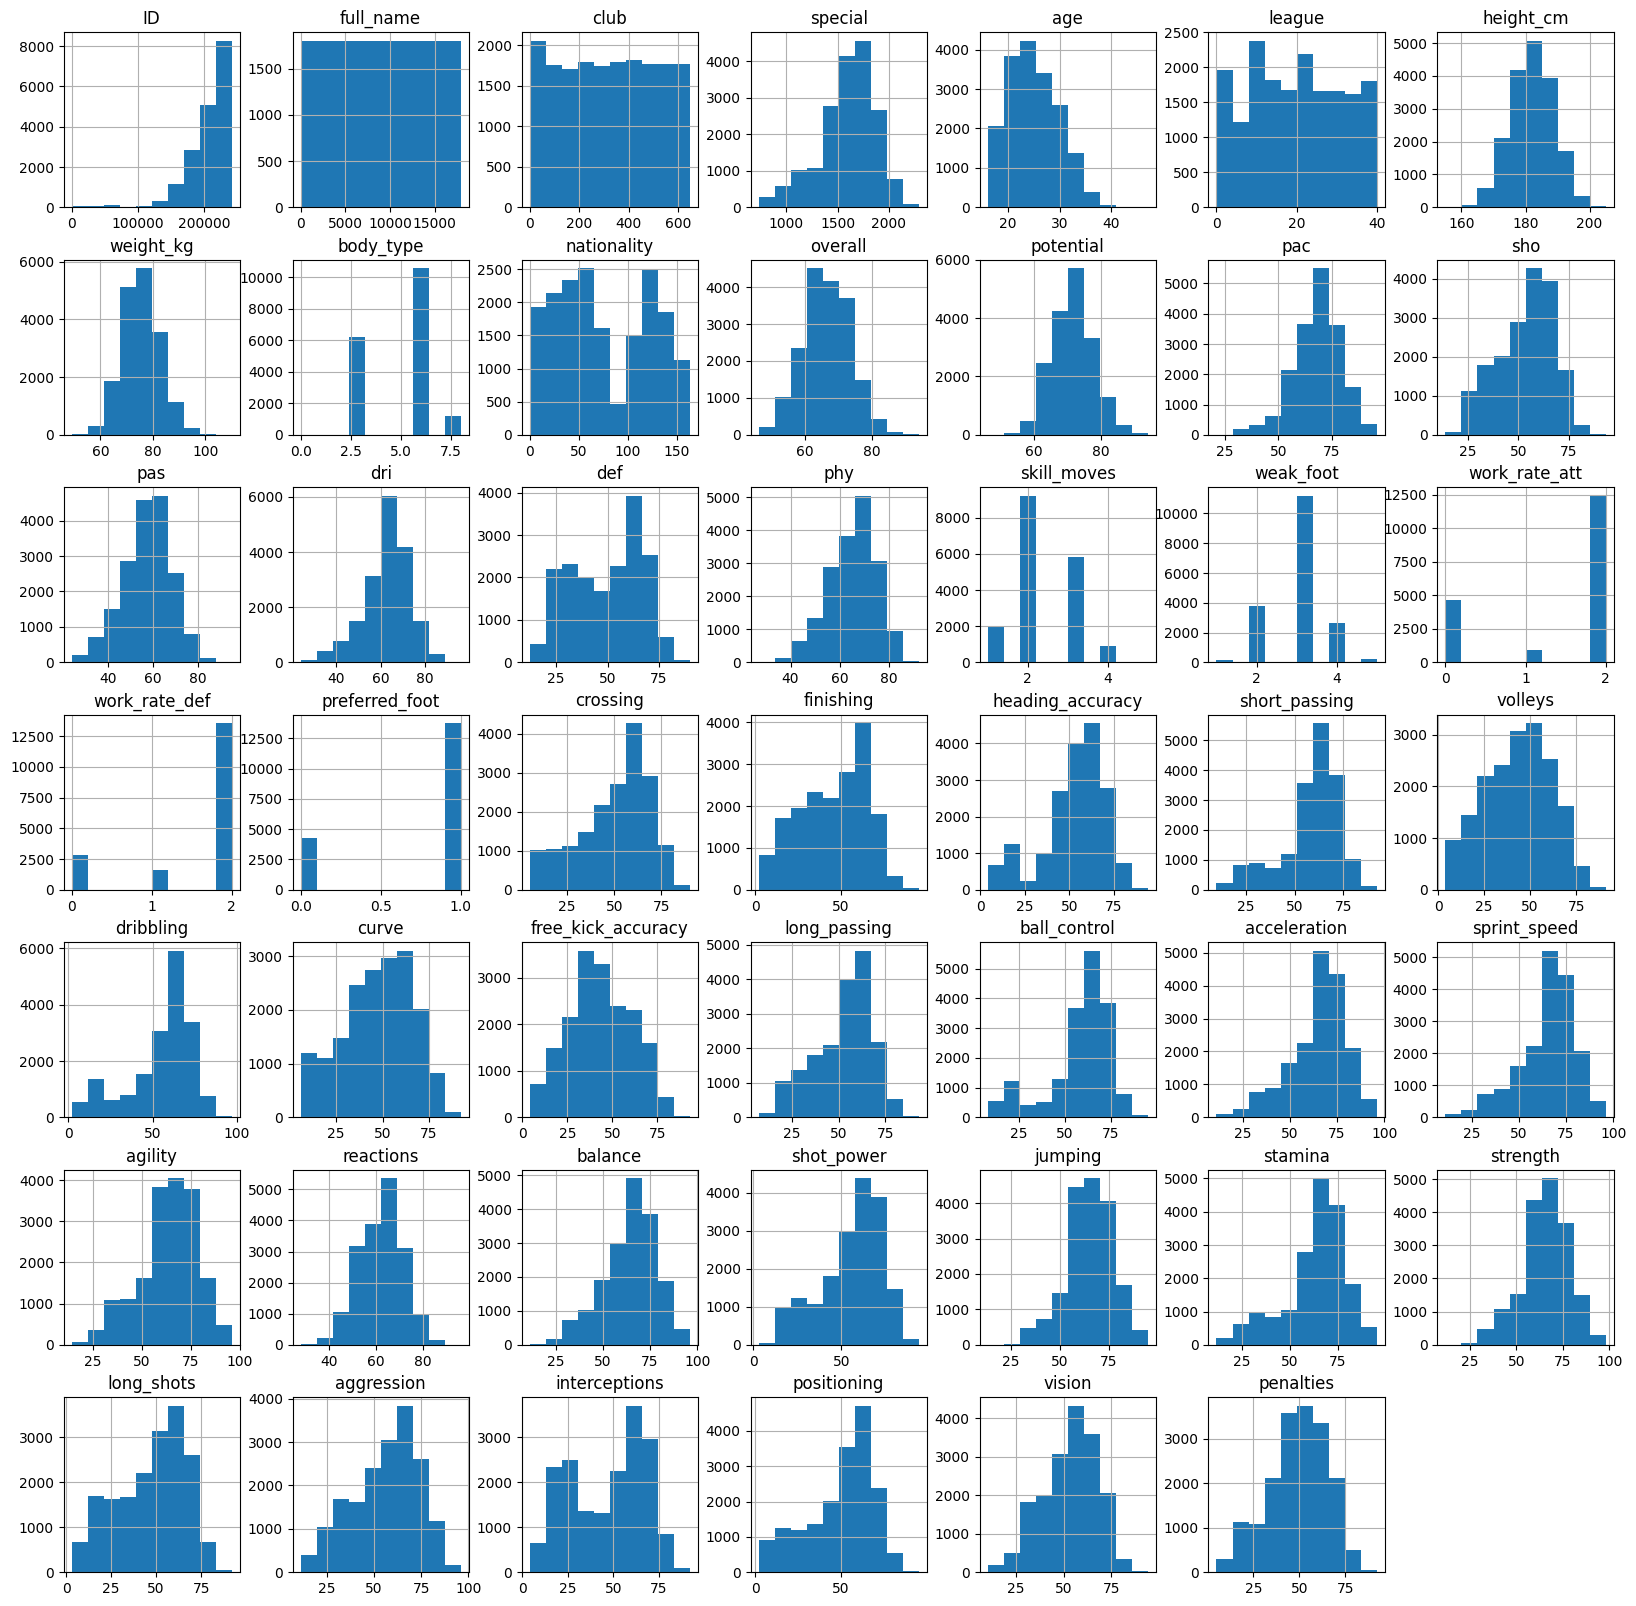

In [ ]:
df.hist(figsize=(20,20))
plt.show()


When analyzing the histograms of various features in the dataset, we observe the following patterns:

**Normal Distribution:**

 Most of the physical attributes such as 'height', 'weight', 'physical', 'overall', 'potential', 'pac' (pace), 'shooting', 'passing', and 'volley' appear to follow a normal distribution. This indicates that these features are evenly distributed, with a bell-shaped curve, suggesting a balanced spread of values across players.

**Bimodal Distribution:**

 Some defending attributes, such as 'interceptions' and 'defending', show a bimodal distribution. This pattern suggests two distinct groups within the data: one group, likely consisting of defenders, with high defensive attributes, and another, likely consisting of forwards, with lower defensive attributes.

**Left Skewed Distribution:**

A few features, including 'shot power', 'dribbling', 'short passing', 'sprint speed', 'positioning', 'stamina', and 'aggression', exhibit a left-skewed distribution. This indicates that most players in the dataset have high attribute values in these areas, with fewer players exhibiting lower values. The right skew suggests that these attributes are generally above average for most players.

These observations can help in understanding the distribution of player attributes and guide further data processing or feature engineering steps.

In [ ]:
colums=df.columns.to_list()
colums.remove('overall')
print(colums)

['ID', 'full_name', 'club', 'special', 'age', 'league', 'height_cm', 'weight_kg', 'body_type', 'nationality', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'skill_moves', 'weak_foot', 'work_rate_att', 'work_rate_def', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties']


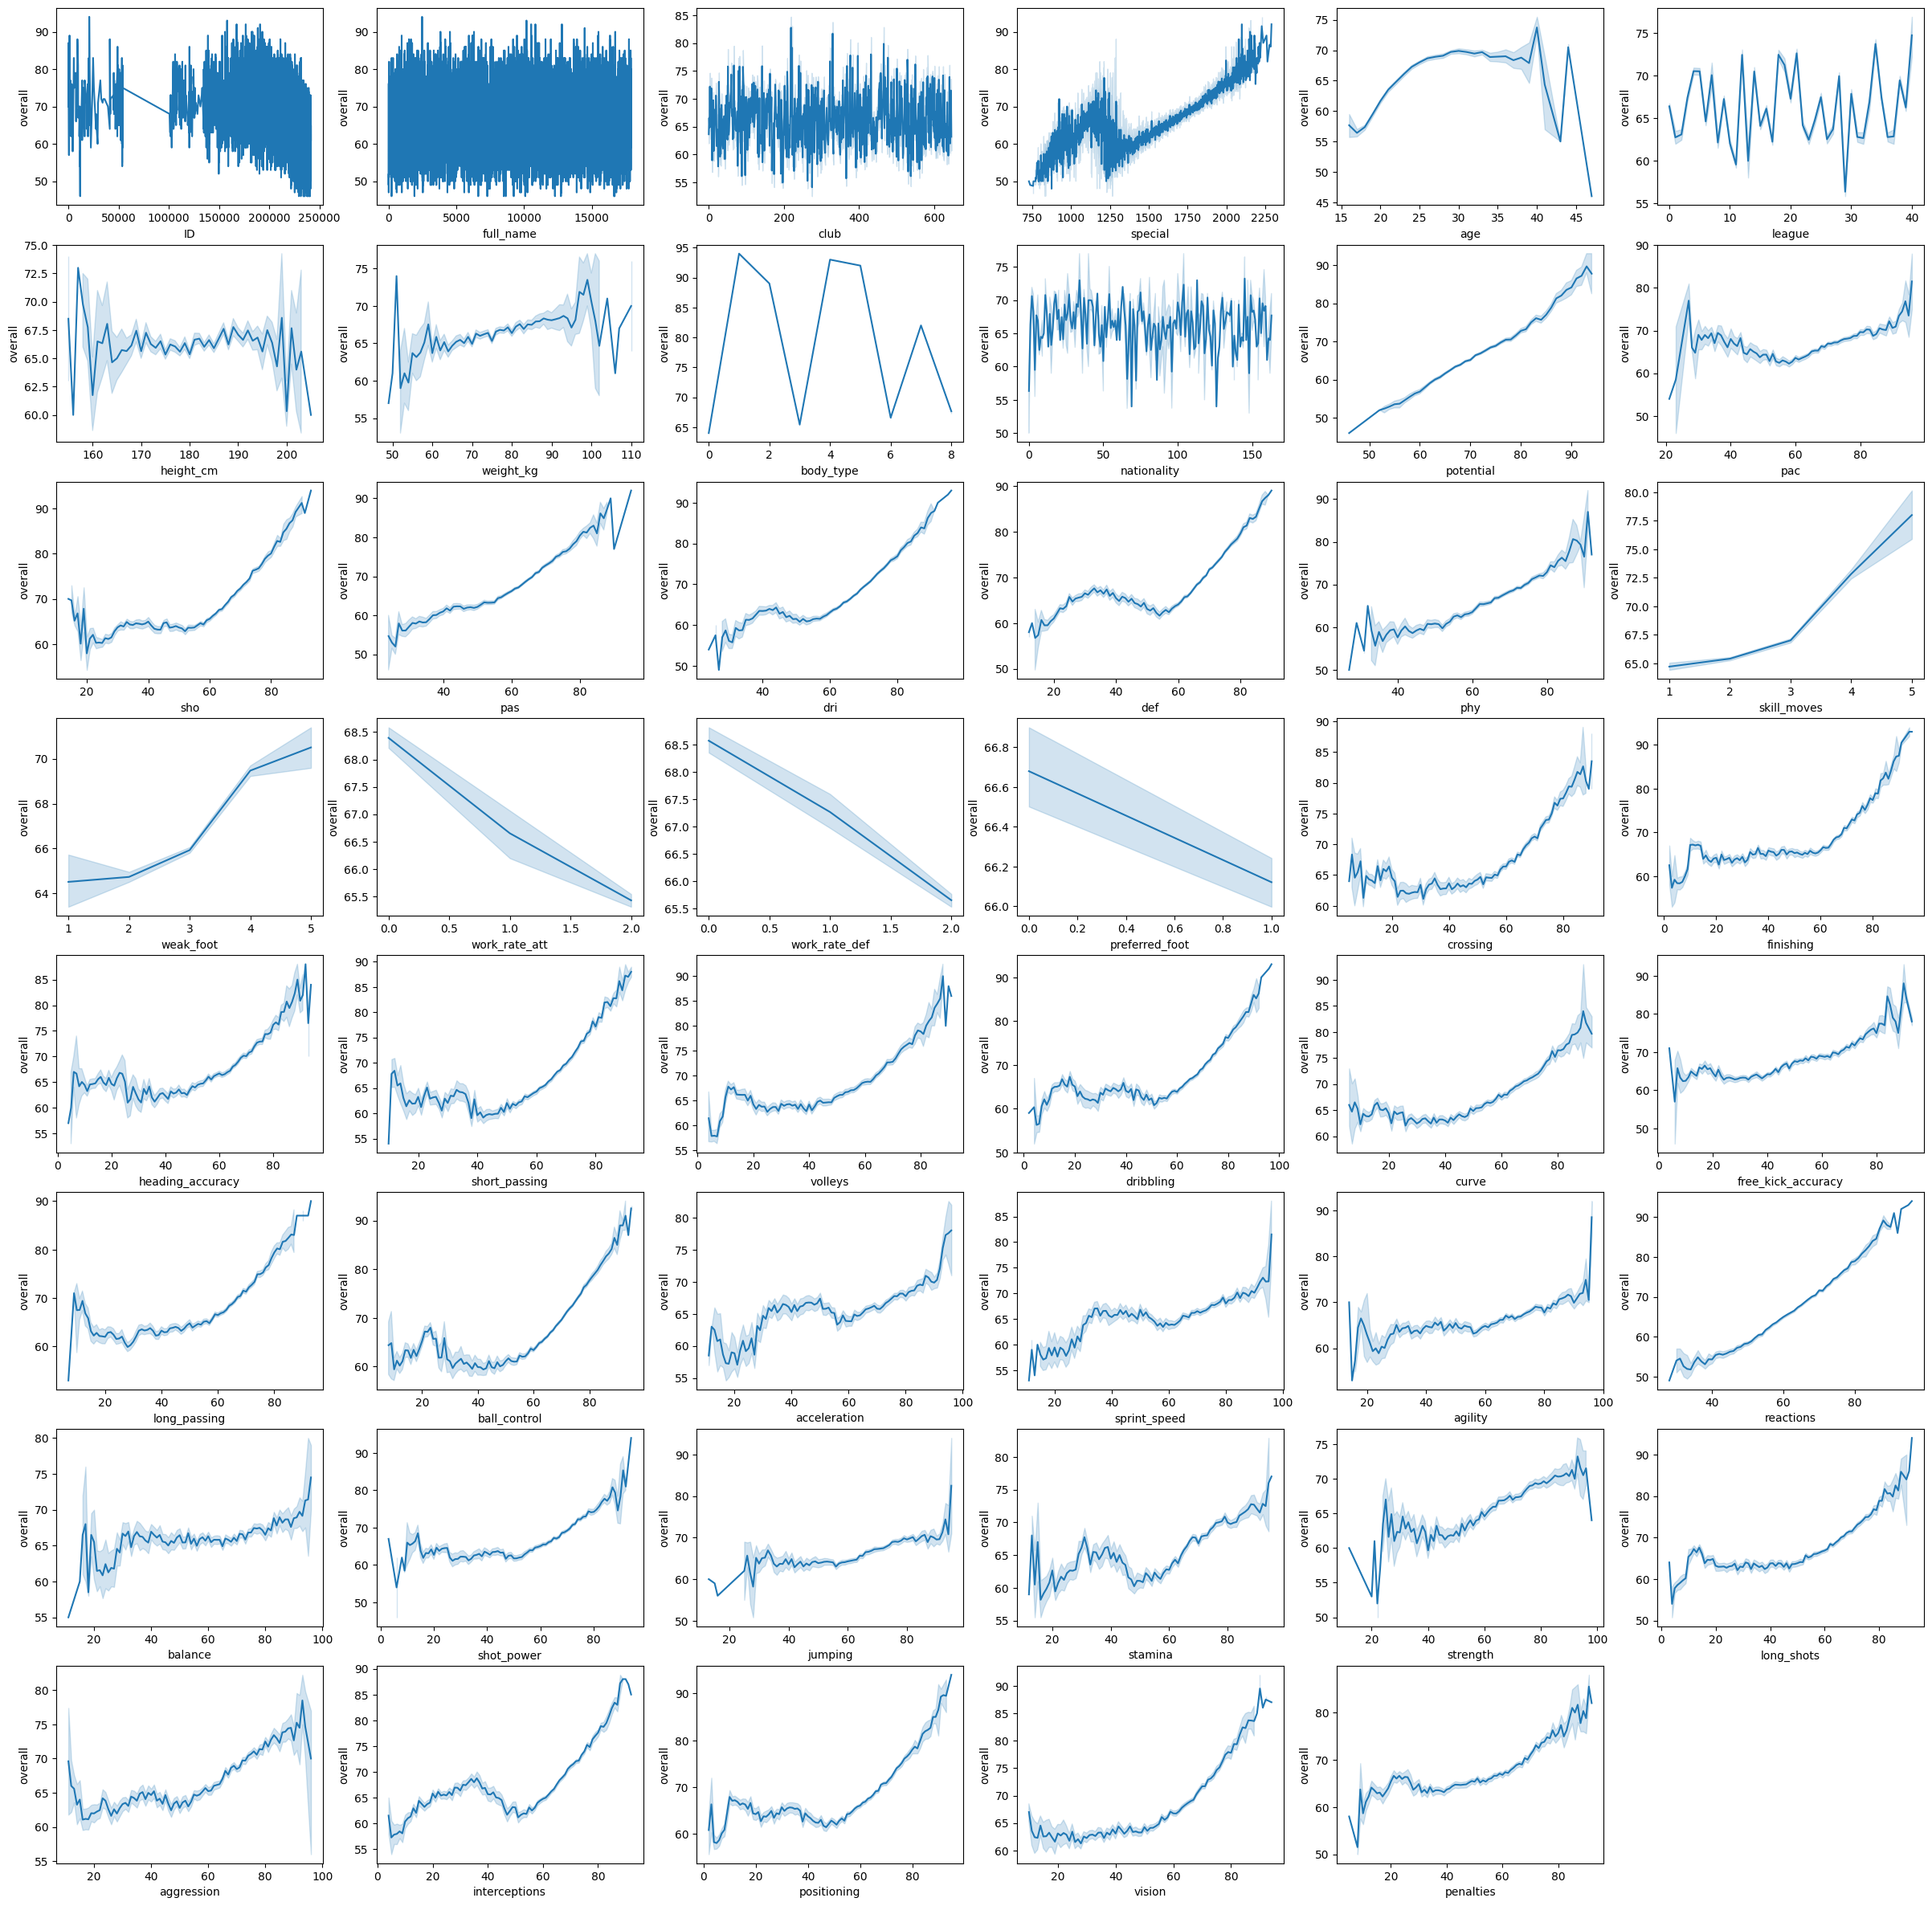

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(len(colums)):
    plt.subplot(8,6,i+1)
    sns.lineplot(x=colums[i],y='overall',data=df)
plt.show()

Upon examining the line plot with various features on the x-axis and the target variable (overall rating) on the y-axis, we can make the following observations:

1. **Direct Proportionality to Overall Rating**: Several features, such as 'potential', 'pac' (pace), 'phy' (physicality), 'skill moves', 'def' (defense), 'dribbling', 'passing', 'shooting', 'crossing', 'free_kick_accuracy', 'curve', 'volleys', 'shot_power', 'long_shots', 'interceptions', 'vision', and 'penalties', show a direct positive relationship with the overall rating. As the values of these features increase, the overall rating tends to increase as well, indicating that players with higher ratings in these attributes tend to have higher overall ratings.

2. **Age and Overall Rating**: When analyzing the 'age' feature, we observe a non-linear relationship. For younger players (lower ages), the overall rating tends to be lower. As players age and reach their peak (around median ages), their overall rating increases. However, for older players, the overall rating starts to decline again, which may be due to physical decline or a reduction in performance with age.

3. **Features with No Real Relation to Overall Rating**: Some features, such as 'league', 'full_name', 'club', 'nationality', and 'ID', do not show any meaningful relationship with the overall rating. These features are either categorical identifiers or location-based attributes, which do not directly affect the performance or skill level of a player. Therefore, these features do not contribute much to predicting the overall rating.

These observations suggest that while certain attributes strongly influence the overall rating, other factors such as the player's age and some categorical attributes (like name and nationality) have less impact on the outcome.

Box plot

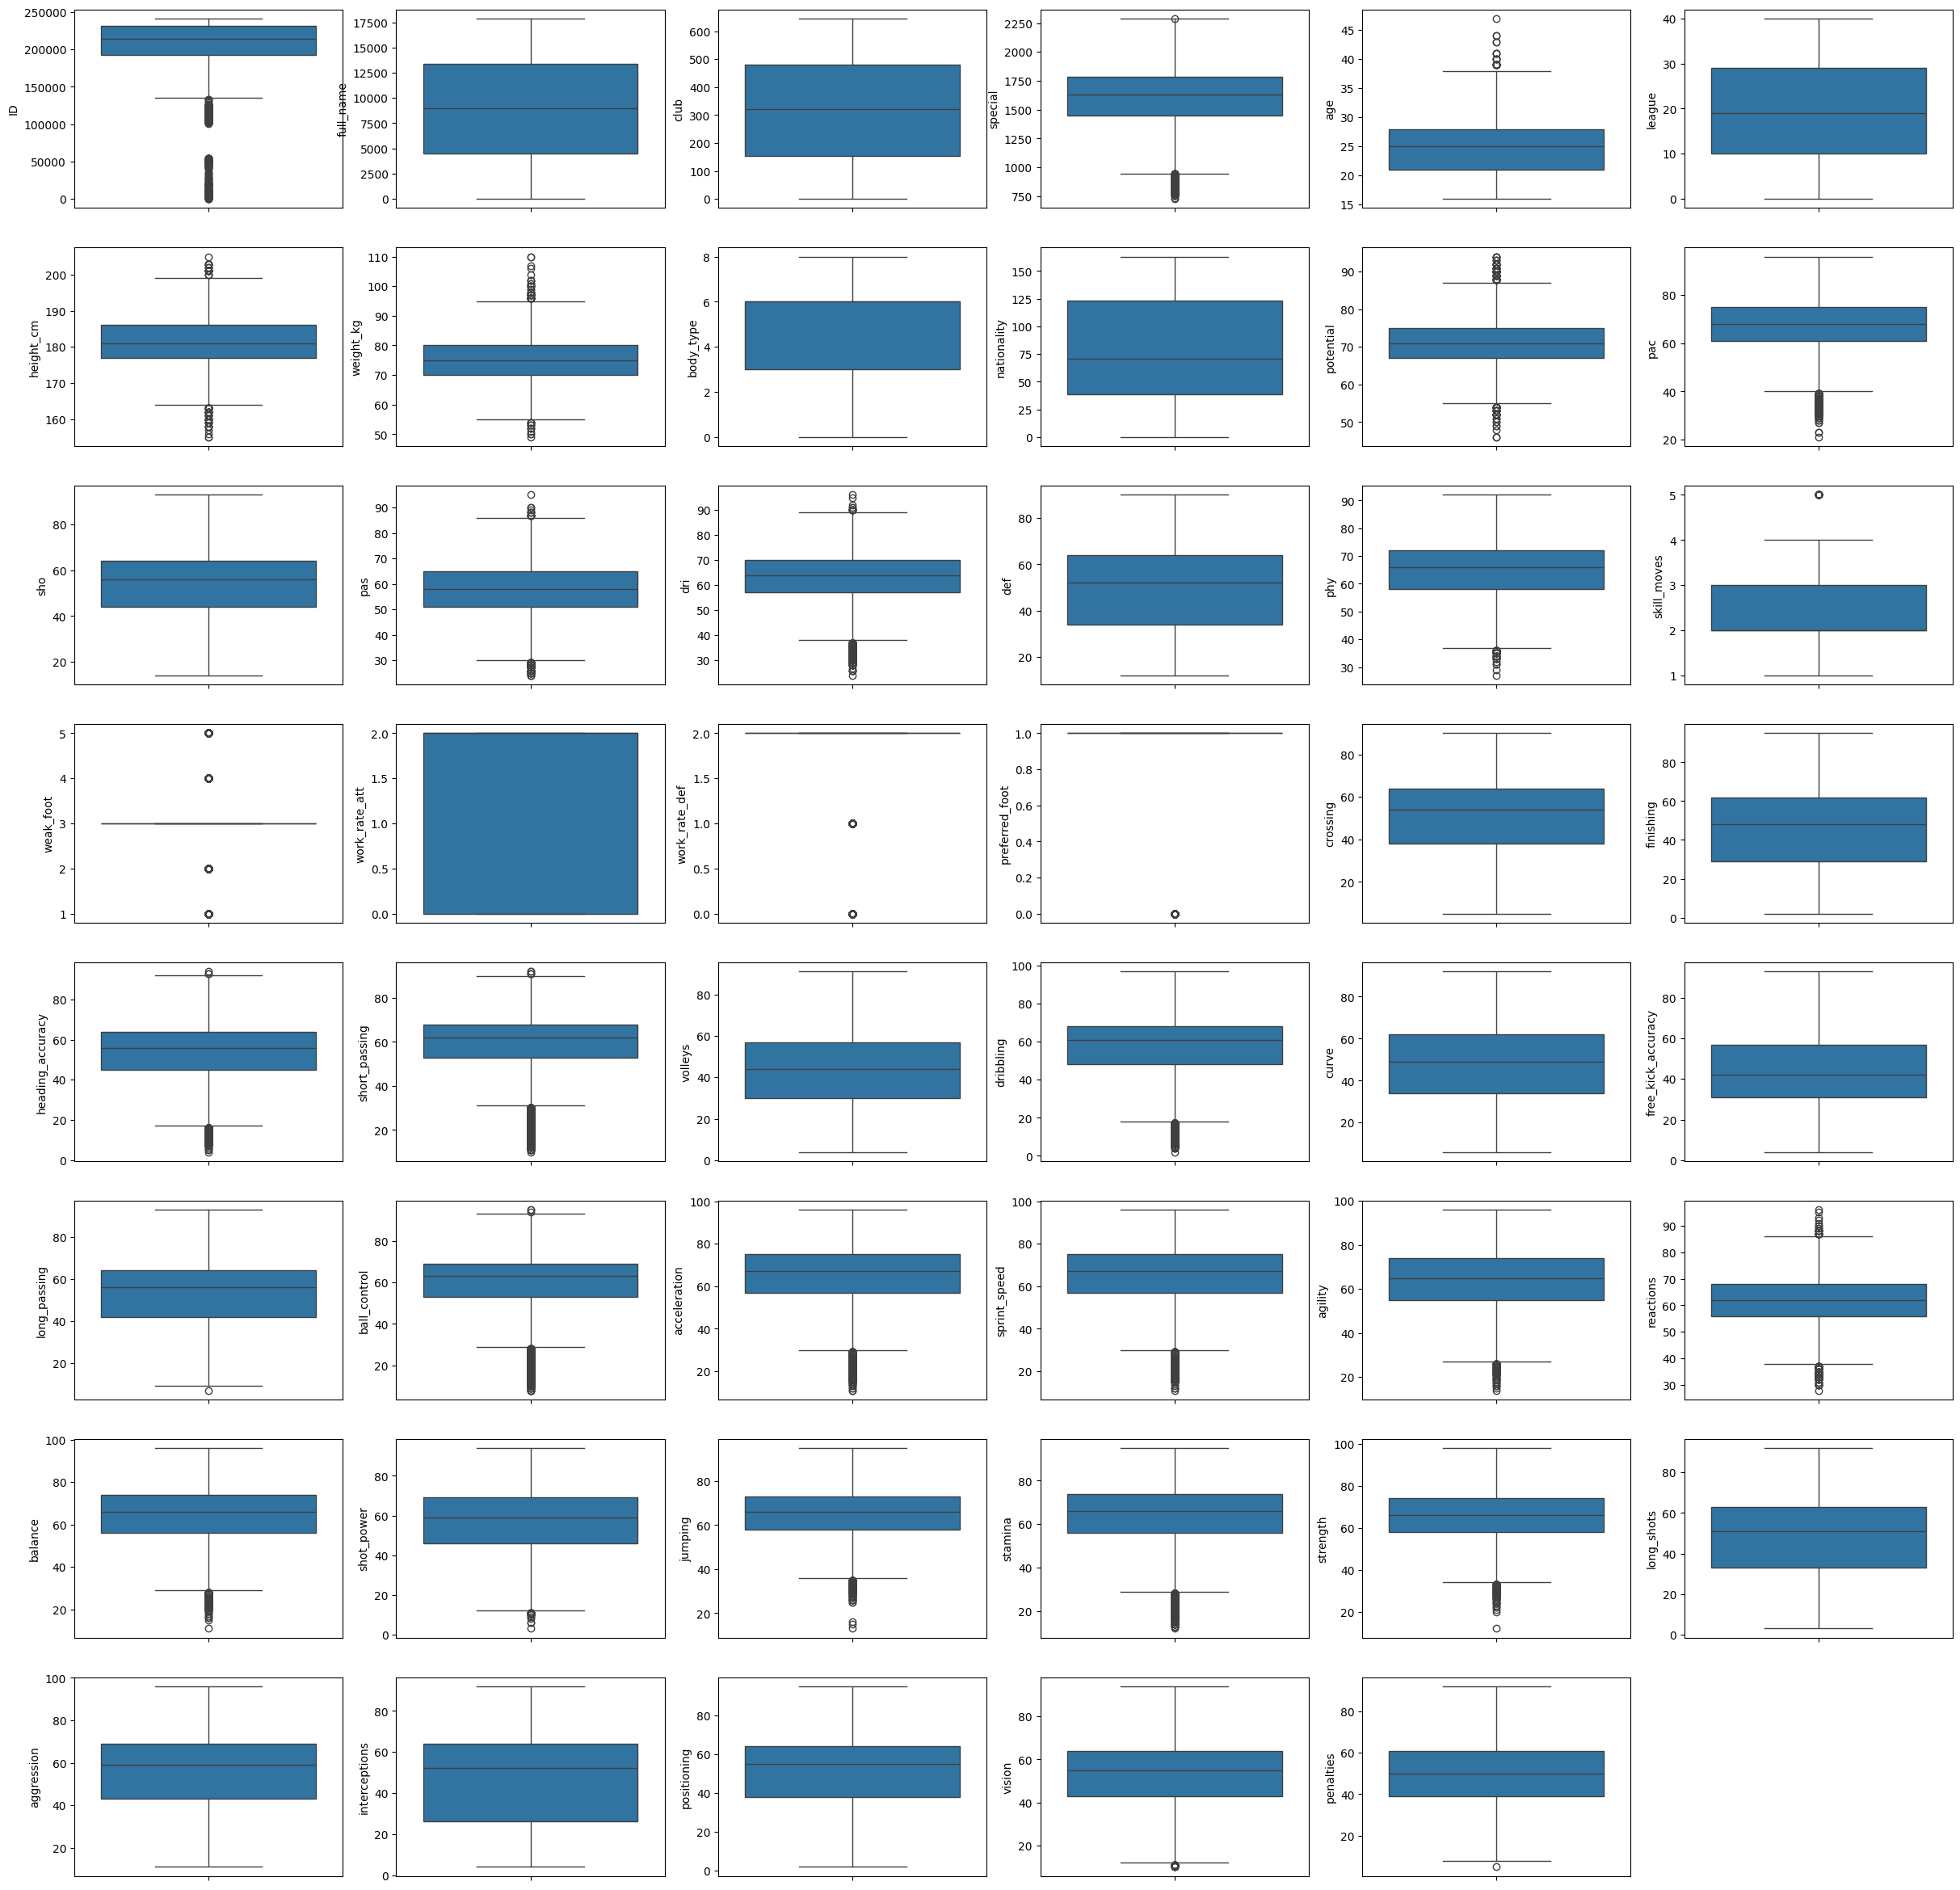

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(len(colums)):
    plt.subplot(8,6,i+1)
    sns.boxplot(df[colums[i]])
plt.show()

Upon examining the box plots, we observed that several features contain outliers, such as 'ID', 'height', 'weight', 'potential', 'pac' (pace), 'reaction', 'agility', 'strength', 'stamina', and 'jumping'. Outliers in 'ID' are expected due to it being a unique identifier for each player. For features like 'height' and 'weight', the outliers likely represent players with exceptional physical builds, such as extremely tall or short players, or those with unusual weight. Similarly, 'potential' shows outliers indicating players with significantly higher future potential, while features like 'pac', 'reaction', 'agility', 'strength', 'stamina', and 'jumping' display outliers due to exceptional athleticism or skill. These outliers may reflect unique player characteristics and can be addressed depending on the modeling approach, either by removing, adjusting, or using models that are robust to outliers.

# 5.correlation analysis

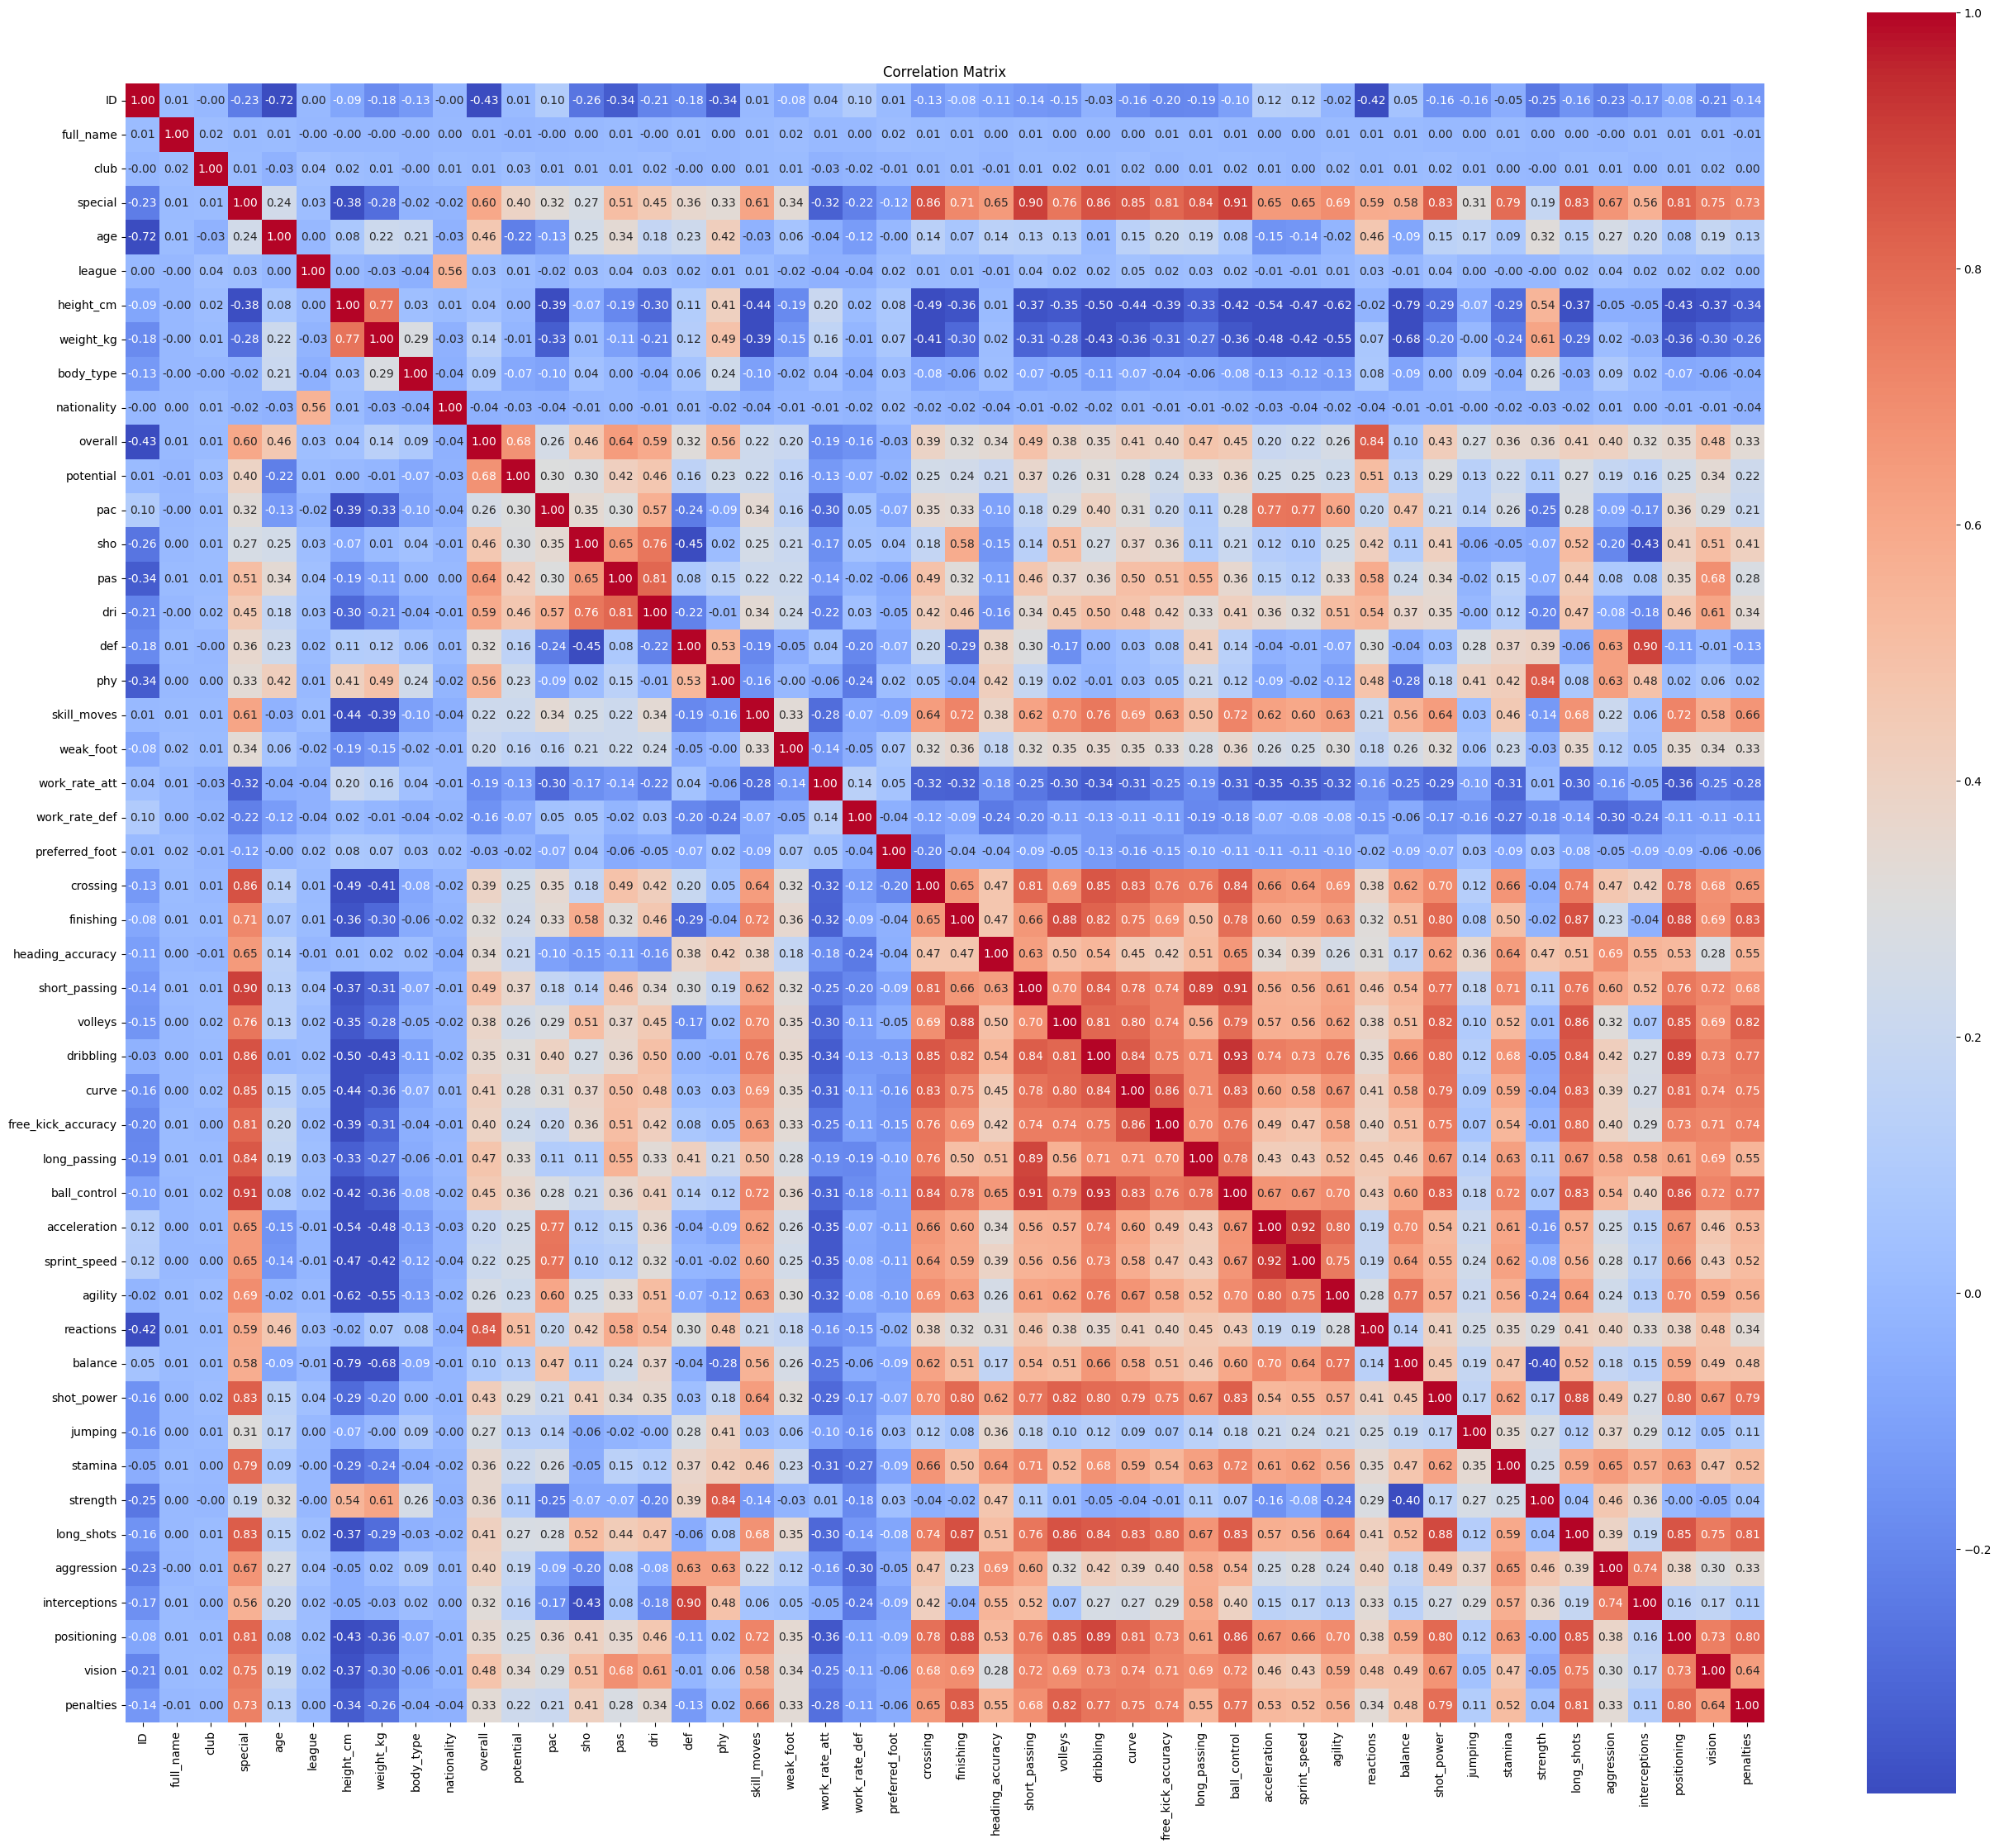

In [ ]:
Corr_matrix=df.corr()
# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
plt.figure(figsize=(32, 28))
sns.heatmap(Corr_matrix,annot=True, fmt='0.02f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

Upon performing the correlation analysis, we found that certain features have a low correlation with the target variable (overall rating), such as 'full_name', 'weight_kg', 'body_type', 'club', 'weak_foot', 'league', 'nationality', 'preferred_foot', 'balance', 'work_rate_att', 'work_rate_def', and 'height_cm'. These features do not significantly contribute to predicting the target, so they can be safely dropped to simplify the model.

Additionally, some features exhibit high correlation with other features. To avoid multicollinearity and improve model performance, we can remove one of the correlated features from each pair. This step helps streamline the dataset by eliminating redundant information, making the model simpler and more efficient while maintaining its predictive power

In [ ]:
#droping the values which have less relation with target
df.drop(['full_name', 'weight_kg', 'body_type','club','weak_foot','league','nationality','preferred_foot','balance','work_rate_att', 'work_rate_def','height_cm'],axis=1,inplace=True)

# also droping the on the feature having high corelation
df.drop(['short_passing','interceptions','sprint_speed','strength'],axis=1,inplace=True)


<ipython-input-119-3e20b9b1f4cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['full_name', 'weight_kg', 'body_type','club','weak_foot','league','nationality','preferred_foot','balance','work_rate_att', 'work_rate_def','height_cm'],axis=1,inplace=True)
<ipython-input-119-3e20b9b1f4cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['short_passing','interceptions','sprint_speed','strength'],axis=1,inplace=True)


In [ ]:
df

ID  special  age  overall  potential  pac  sho  pas  dri  def  ...  \
0       20801     2228   32       94         94   90   93   82   90   33  ...   
1      158023     2158   30       93         93   89   90   86   96   26  ...   
2      190871     2100   25       92         94   92   84   79   95   30  ...   
3      176580     2291   30       92         92   82   90   79   87   42  ...   
4      167495     1493   31       92         92   91   90   95   89   60  ...   
...       ...      ...  ...      ...        ...  ...  ...  ...  ...  ...  ...   
17989  237463      755   17       46         63   46   47   49   48   28  ...   
17990   11728      832   47       46         46   39   50   39   37   25  ...   
17991  231381     1194   17       46         61   58   47   35   43   20  ...   
17992  238813     1302   18       46         64   58   35   44   45   45  ...   
17993  238308     1031   18       46         64   49   20   24   30   41  ...   

       agility  reactions  shot_power  jumping  stamina  long_shots  \
0           89         96          94       95       92          92   
1           90         95          85       68       73          88   
2           96         88          80       61       78          77   
3           86         93          87       69       89          86   
4           52         85          25       78       44          16   
...        ...        ...         ...      ...      ...         ...   
17989       38         40          19       31       28           7   
17990       35         51          13       51       32          16   
17991       60         54          42       73       33          51   
17992       58         49          43       56       49          32   
17993       49         40          21       60       55          17   

       aggression  positioning  vision  penalties  
0              63           95      85         85  
1              48           93      90         78  
2              56           90      80         81  
3              78           92      84         85  
4              29           12      70         47  
...           ...          ...     ...        ...  
17989          16            6      26         17  
17990          44           13      17         22  
17991          26           46      37         58  
17992          46           37      51         43  
17993          52           20      22         21  

[17994 rows x 32 columns]

# 6.Outlier detection

Before removing outliers, it is important to first train the model and evaluate its performance to understand the baseline accuracy and error. This will allow us to compare the model's performance after handling the outliers and see if there is a significant change. By training the model on the data as is, without any adjustments, we can observe the initial results and error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared. Once this baseline is established, we can proceed to handle the outliers and retrain the model, comparing the performance to see if outlier removal or adjustment has a noticeable impact on model accuracy and error reduction.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
features=df.columns.tolist()
features.remove('overall')
X = df[features]
y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         1.440678  1.847977  0.929128
Ridge Regression          1.440676  1.847975  0.929128
Lasso Regression          1.521292  1.955801  0.920617
ElasticNet Regression     1.479622  1.901634  0.924953
Decision Tree             1.052515  1.651323  0.943409
Random Forest             0.684915  1.003315  0.979109
Gradient Boosting         0.862043  1.163376  0.971912
Support Vector Regressor  0.664533  1.009781  0.978839
K-Nearest Neighbors       3.273131  4.270803  0.621471
Neural Network            0.544221  0.725406  0.989079



Now that we've established the baseline model, we can remove outliers to potentially improve performance. To do this, we can use methods like the IQR (Interquartile Range) or Z-score to identify and filter out extreme values for features such as 'height', 'weight', 'potential', and others. After detecting outliers, we remove them from the dataset and retrain the model. Comparing the model's performance before and after removing the outliers will help determine if this step leads to improved accuracy and reduced error.

In [ ]:
features=df.columns.tolist()
features.remove('overall')
df2=df.copy()
for i in features:
    #calculate Q1,Q2,and Q3
    Q1= np.quantile(df2[i],0.25)
    Q2=np.quantile(df2[i],.5)
    Q3=np.quantile(df2[i],0.75)
    IQR=Q3-Q1
    #calculate outliers boundaries
    lower_bound=Q1-1.5*IQR
    upper_bound =Q3+1.5*IQR
    #Identify Outlier
    outliers=[x for x in df[i] if x<lower_bound or x > upper_bound ]
    print(f'Number of outliers in {i}: {len(outliers)}')
    #Any dat point below the Lower Bound or above the upper Bound is considered as an outliers
    df2=df2[~df2[i].isin(outliers)]

df2.info()

Number of outliers in ID: 341
Number of outliers in special: 458
Number of outliers in age: 30
Number of outliers in potential: 156
Number of outliers in pac: 437
Number of outliers in sho: 0
Number of outliers in pas: 122
Number of outliers in dri: 436
Number of outliers in def: 0
Number of outliers in phy: 38
Number of outliers in skill_moves: 40
Number of outliers in crossing: 4
Number of outliers in finishing: 0
Number of outliers in heading_accuracy: 1508
Number of outliers in volleys: 0
Number of outliers in dribbling: 2625
Number of outliers in curve: 3
Number of outliers in free_kick_accuracy: 0
Number of outliers in long_passing: 1197
Number of outliers in ball_control: 2474
Number of outliers in acceleration: 1890
Number of outliers in agility: 1098
Number of outliers in reactions: 133
Number of outliers in shot_power: 2039
Number of outliers in jumping: 443
Number of outliers in stamina: 2129
Number of outliers in long_shots: 667
Number of outliers in aggression: 204
Number 

now we can train the dataset after removing the outliers

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
features=df.columns.tolist()
features.remove('overall')
X = df2[features]
y = df2['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         1.360994  1.742586  0.928717
Ridge Regression          1.360989  1.742585  0.928717
Lasso Regression          1.490492  1.912260  0.914159
ElasticNet Regression     1.432226  1.838424  0.920660
Decision Tree             1.076749  1.644145  0.936543
Random Forest             0.706163  1.033871  0.974908
Gradient Boosting         0.851711  1.115994  0.970764
Support Vector Regressor  0.681572  0.938201  0.979337
K-Nearest Neighbors       3.057164  3.905301  0.641979
Neural Network            0.588573  0.784619  0.985548


After removing the outliers, we observed that the model's performance actually decreased, with the **R² score** dropping from **0.989079** to **0.985548**, the **RMSE** increasing from **0.725406** to **0.784619**, and the **MAE** rising from **0.544221** to **0.588573**. This indicates that removing the outliers did not improve the model and, in fact, led to a decrease in accuracy.

Given this, we have decided to revert to the original dataset without removing the outliers and focus on performing further balancing steps on the data instead. This will help ensure that the model can achieve better performance without sacrificing accuracy due to the removal of valuable information from the dataset.

# 7.Feature engineering

We did not perform any additional feature engineering because the dataset already contains a sufficient number of relevant features. These features cover a broad spectrum of player attributes, including physical, technical, and tactical aspects, which are crucial for predicting the target variable (overall player rating). The dataset is comprehensive enough that further engineering or creation of new features was not deemed necessary. Additionally, many of the features already have clear relationships with the target, making them suitable for the model without needing additional transformations or combinations. Therefore, we focused on data preprocessing, such as handling missing values and scaling, rather than creating new features.

# 8.pca

To apply **PCA (Principal Component Analysis)** for dimensionality reduction, we first **standardize** the data to ensure all features are on the same scale. Next, we apply PCA to reduce the dimensionality while retaining a significant amount of the variance (e.g., 95%). After applying PCA, we split the data into training and testing sets, train the model on the transformed data, and evaluate its performance using **R²**, **RMSE**, and **MAE**. This reduces the number of features, potentially improving model efficiency without losing important information.

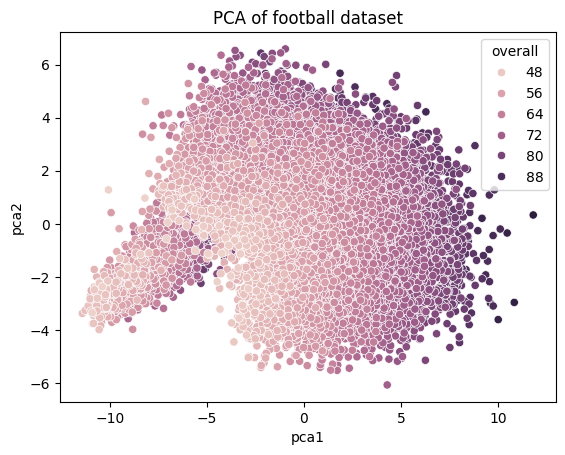

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df3=df.copy()
# Standardize the features before PCA

X = StandardScaler().fit_transform(df.drop('overall',axis=1))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df3['pca1'] = pca_result[:, 0]
df3['pca2'] = pca_result[:, 1]


# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='overall', data=df3)
plt.title('PCA of football dataset')
plt.show()

In [ ]:
df3.columns

Index(['ID', 'special', 'age', 'overall', 'potential', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'skill_moves', 'crossing', 'finishing',
       'heading_accuracy', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'agility', 'reactions', 'shot_power', 'jumping', 'stamina',
       'long_shots', 'aggression', 'positioning', 'vision', 'penalties',
       'pca1', 'pca2'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
features=df.columns.tolist()
features.remove('overall')
X = df3[['pca1','pca2']]
y = df3['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         4.213737  5.543491  0.362255
Ridge Regression          4.213739  5.543490  0.362255
Lasso Regression          4.257279  5.555120  0.359576
ElasticNet Regression     4.251163  5.551067  0.360510
Decision Tree             3.246735  4.644548  0.552320
Random Forest             2.528136  3.486862  0.747681
Gradient Boosting         2.397636  3.276106  0.777261
Support Vector Regressor  2.518747  3.510956  0.744182
K-Nearest Neighbors       2.528369  3.486029  0.747801
Neural Network            2.399856  3.289959  0.775373


When applying PCA with only **2 components**, we observed a decrease in accuracy, likely due to the loss of important information from the original dataset. Reducing the total of **32 columns** to just 2 components may have resulted in significant data compression, leading to lower model performance. To address this issue, we plan to use **PCA with 10 components**, which will retain more of the original data's variance while still reducing dimensionality. This should help preserve crucial information, potentially improving accuracy and model predictions.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df4=df.copy()
# Standardize the features before PCA

X = StandardScaler().fit_transform(df.drop('overall',axis=1))

# Apply PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X)


# Add PCA results to the DataFrame
for i in range(10):
    df4['pca'+str(i+1)]=pca_result[:,i]

df4.columns

<ipython-input-87-0b1c7015e365>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca'+str(i+1)]=pca_result[:,i]


Index(['ID', 'special', 'age', 'overall', 'potential', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'skill_moves', 'crossing', 'finishing',
       'heading_accuracy', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'agility', 'reactions', 'shot_power', 'jumping', 'stamina',
       'long_shots', 'aggression', 'positioning', 'vision', 'penalties',
       'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = df4[['pca1','pca2','pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10']]
y = df4['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         1.734539  2.228324  0.896953
Ridge Regression          1.734539  2.228322  0.896953
Lasso Regression          2.414607  3.056614  0.806107
ElasticNet Regression     2.318135  2.932048  0.821589
Decision Tree             1.881078  2.459904  0.874421
Random Forest             1.269611  1.635120  0.944514
Gradient Boosting         1.345156  1.738582  0.937271
Support Vector Regressor  1.070821  1.512257  0.952540
K-Nearest Neighbors       1.304585  1.696644  0.940260
Neural Network            0.975511  1.270797  0.966485



After applying PCA with 10 components, we found that the accuracy still did not match the performance of the initial model. Despite retaining more variance from the data, the reduction in features still resulted in a decrease in model performance. As a result, we have decided to continue with the original data without dimensionality reduction, as it yields better accuracy and predictions.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df5=df.copy()
# Standardize the features before PCA

X = StandardScaler().fit_transform(df.drop('overall',axis=1))

# Apply PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(X)


# Add PCA results to the DataFrame
for i in range(20):
    df5['pca'+str(i+1)]=pca_result[:,i]

df5.columns

Index(['ID', 'special', 'age', 'overall', 'potential', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'skill_moves', 'crossing', 'finishing',
       'heading_accuracy', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'agility', 'reactions', 'shot_power', 'jumping', 'stamina',
       'long_shots', 'aggression', 'positioning', 'vision', 'penalties',
       'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19', 'pca20'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = df5[['pca1','pca2','pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10','pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19', 'pca20']]
y = df5['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         1.535419  1.956132  0.920590
Ridge Regression          1.535419  1.956137  0.920589
Lasso Regression          2.419344  3.065866  0.804932
ElasticNet Regression     2.323287  2.941240  0.820468
Decision Tree             1.912754  2.511103  0.869139
Random Forest             1.263220  1.640185  0.944170
Gradient Boosting         1.312362  1.695596  0.940334
Support Vector Regressor  1.073683  1.552621  0.949972
K-Nearest Neighbors       1.325535  1.709705  0.939337
Neural Network            0.702475  0.924989  0.982244


After applying **PCA with 20 components**, we obtained the following performance metrics: **MAE: 0.702475**, **RMSE: 0.924989**, and **R² score: 0.982244**. However, when comparing these results to the initial model, which had **R² score: 0.989079**, **RMSE: 0.725406**, and **MAE: 0.544221**, we observed a decrease in performance. This suggests that while using more components in PCA (20 components) improved the accuracy compared to 10 components, the dimensionality reduction still led to a reduction in overall model performance. As a result, the initial model using the original features without PCA continues to yield the best results.

# 9.Data scaling

In [ ]:
df[features]

ID  special  age  potential  pac  sho  pas  dri  def  phy  ...  \
0       20801     2228   32         94   90   93   82   90   33   80  ...   
1      158023     2158   30         93   89   90   86   96   26   61  ...   
2      190871     2100   25         94   92   84   79   95   30   60  ...   
3      176580     2291   30         92   82   90   79   87   42   81  ...   
4      167495     1493   31         92   91   90   95   89   60   91  ...   
...       ...      ...  ...        ...  ...  ...  ...  ...  ...  ...  ...   
17989  237463      755   17         63   46   47   49   48   28   42  ...   
17990   11728      832   47         46   39   50   39   37   25   50  ...   
17991  231381     1194   17         61   58   47   35   43   20   33  ...   
17992  238813     1302   18         64   58   35   44   45   45   47  ...   
17993  238308     1031   18         64   49   20   24   30   41   61  ...   

       agility  reactions  shot_power  jumping  stamina  long_shots  \
0           89         96          94       95       92          92   
1           90         95          85       68       73          88   
2           96         88          80       61       78          77   
3           86         93          87       69       89          86   
4           52         85          25       78       44          16   
...        ...        ...         ...      ...      ...         ...   
17989       38         40          19       31       28           7   
17990       35         51          13       51       32          16   
17991       60         54          42       73       33          51   
17992       58         49          43       56       49          32   
17993       49         40          21       60       55          17   

       aggression  positioning  vision  penalties  
0              63           95      85         85  
1              48           93      90         78  
2              56           90      80         81  
3              78           92      84         85  
4              29           12      70         47  
...           ...          ...     ...        ...  
17989          16            6      26         17  
17990          44           13      17         22  
17991          26           46      37         58  
17992          46           37      51         43  
17993          52           20      22         21  

[17994 rows x 31 columns]

standard scaler

We are now applying **data scaling** using the **StandardScaler** to the initial dataset. Data scaling is an important preprocessing step, especially for models that are sensitive to the magnitude of the features, such as linear regression and neural networks. The **StandardScaler** standardizes the features by removing the mean and scaling them to unit variance. This ensures that all features contribute equally to the model's performance, avoiding biases that could arise from features with larger magnitudes. By scaling the data, we aim to improve the accuracy and efficiency of our model while maintaining the integrity of the original dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler()

dfs1=df.copy()
dfs1[features]= Standard_scaler.fit_transform(df[features])
dfs1[features]

ID   special       age  potential       pac       sho       pas  \
0     -5.784241  2.332953  1.490016   3.748796  2.035232  2.856478  2.337819   
1     -1.539513  2.075202  1.056862   3.584372  1.943802  2.639611  2.719990   
2     -0.523416  1.861637 -0.026022   3.748796  2.218092  2.205878  2.051190   
3     -0.965484  2.564929  1.056862   3.419949  1.303793  2.639611  2.051190   
4     -1.246513 -0.373435  1.273439   3.419949  2.126662  2.639611  3.579874   
...         ...       ...       ...        ...       ...       ...       ...   
17989  0.917828 -3.090869 -1.758637  -1.348341 -1.987683 -0.468809 -0.815092   
17990 -6.064899 -2.807343  4.738668  -4.143545 -2.627692 -0.251942 -1.770520   
17991  0.729692 -1.474401 -1.758637  -1.677188 -0.890524 -0.468809 -2.152691   
17992  0.959588 -1.076727 -1.542060  -1.183917 -0.890524 -1.336275 -1.292806   
17993  0.943967 -2.074593 -1.542060  -1.183917 -1.713393 -2.420607 -3.203661   

            dri       def       phy  ...   agility  reactions  shot_power  \
0      2.641270 -0.958211  1.577350  ...  1.738581   3.731511    2.205432   
1      3.219467 -1.367097 -0.390070  ...  1.806356   3.622092    1.687558   
2      3.123101 -1.133448 -0.493619  ...  2.213008   2.856160    1.399850   
3      2.352172 -0.432501  1.680899  ...  1.535255   3.403254    1.802641   
4      2.544904  0.618918  2.716383  ... -0.769102   2.527903   -1.764939   
...         ...       ...       ...  ...       ...        ...         ...   
17989 -1.406108 -1.250272 -2.357491  ... -1.717956  -2.395948   -2.110188   
17990 -2.466136 -1.425509 -1.529104  ... -1.921281  -1.192340   -2.455438   
17991 -1.887939 -1.717570 -3.289427  ... -0.226901  -0.864084   -0.786731   
17992 -1.695207 -0.257265 -1.839749  ... -0.362451  -1.411178   -0.729190   
17993 -3.140699 -0.490914 -0.390070  ... -0.972428  -2.395948   -1.995105   

        jumping   stamina  long_shots  aggression  positioning    vision  \
0      2.535237  1.807975    2.323191    0.410876     2.334414  2.226624   
1      0.262210  0.611151    2.115584   -0.448471     2.231392  2.574869   
2     -0.327093  0.926105    1.544664    0.009848     2.076860  1.878379   
3      0.346397  1.619003    2.011780    1.270223     2.179882  2.156975   
4      1.104072 -1.215581   -1.621343   -1.536977    -1.940981  1.181889   
...         ...       ...         ...         ...          ...       ...   
17989 -2.852677 -2.223432   -2.088459   -2.281744    -2.250046 -1.882667   
17990 -1.168954 -1.971469   -1.621343   -0.677630    -1.889470 -2.509508   
17991  0.683141 -1.908479    0.195219   -1.708846    -0.189614 -1.116528   
17992 -0.748024 -0.900627   -0.790915   -0.563050    -0.653211 -0.141442   
17993 -0.411279 -0.522682   -1.569441   -0.219312    -1.528895 -2.161263   

       penalties  
0       2.278817  
1       1.835847  
2       2.025691  
3       2.278817  
4      -0.125877  
...          ...  
17989  -2.024319  
17990  -1.707912  
17991   0.570219  
17992  -0.379003  
17993  -1.771194  

[17994 rows x 31 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = dfs1[features]
y = dfs1['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

NameError: name 'dfs1' is not defined

After applying **Standard Scaling** to the initial dataset, we obtained the following performance metrics: **MAE: 0.537520**, **RMSE: 0.723664**, and **R² score: 0.989132**. When compared to the initial model, which had **R² score: 0.989079**, **RMSE: 0.725406**, and **MAE: 0.544221**, we observed a slight improvement in the performance. The scaled data resulted in a marginal increase in the R² score and a reduction in both MAE and RMSE, indicating that scaling the features has had a positive effect on the model's accuracy and predictive capability, even though the changes are minimal. This suggests that standard scaling helped fine-tune the model and improve its overall performance.

### also check with min-max scaler

Next, we are applying the **MinMaxScaler** to the dataset. The **MinMaxScaler** is a feature scaling technique that transforms the features by scaling them to a specified range, typically between 0 and 1. Unlike the **StandardScaler**, which standardizes data by removing the mean and scaling to unit variance, the **MinMaxScaler** preserves the relationships between the original data points while ensuring that all features are on the same scale. This transformation can be particularly useful for models that are sensitive to the scale of the features, such as support vector machines or neural networks. By applying the **MinMaxScaler**, we aim to improve the model's performance by ensuring that all features contribute equally, potentially leading to more efficient and accurate predictions.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()

dfs2=df.copy()
dfs2[features]=MinMax_scaler.fit_transform(dfs2[features])
dfs2[features]

ID   special       age  potential       pac       sho       pas  \
0      0.086076  0.959693  0.516129   1.000000  0.920000  1.000000  0.816901   
1      0.654346  0.914907  0.451613   0.979167  0.906667  0.962025  0.873239   
2      0.790378  0.877799  0.290323   1.000000  0.946667  0.886076  0.774648   
3      0.731196  1.000000  0.451613   0.958333  0.813333  0.962025  0.774648   
4      0.693572  0.489443  0.483871   0.958333  0.933333  0.962025  1.000000   
...         ...       ...       ...        ...       ...       ...       ...   
17989  0.983327  0.017274  0.032258   0.354167  0.333333  0.417722  0.352113   
17990  0.048502  0.066539  1.000000   0.000000  0.240000  0.455696  0.211268   
17991  0.958140  0.298145  0.032258   0.312500  0.493333  0.417722  0.154930   
17992  0.988918  0.367242  0.064516   0.375000  0.493333  0.265823  0.281690   
17993  0.986827  0.193858  0.064516   0.375000  0.373333  0.075949  0.000000   

            dri       def       phy  ...   agility  reactions  shot_power  \
0      0.916667  0.269231  0.815385  ...  0.914634   1.000000    1.000000   
1      1.000000  0.179487  0.523077  ...  0.926829   0.985294    0.901099   
2      0.986111  0.230769  0.507692  ...  1.000000   0.882353    0.846154   
3      0.875000  0.384615  0.830769  ...  0.878049   0.955882    0.923077   
4      0.902778  0.615385  0.984615  ...  0.463415   0.838235    0.241758   
...         ...       ...       ...  ...       ...        ...         ...   
17989  0.333333  0.205128  0.230769  ...  0.292683   0.176471    0.175824   
17990  0.180556  0.166667  0.353846  ...  0.256098   0.338235    0.109890   
17991  0.263889  0.102564  0.092308  ...  0.560976   0.382353    0.428571   
17992  0.291667  0.423077  0.307692  ...  0.536585   0.308824    0.439560   
17993  0.083333  0.371795  0.523077  ...  0.426829   0.176471    0.197802   

        jumping   stamina  long_shots  aggression  positioning    vision  \
0      1.000000  0.963855    1.000000    0.611765     1.000000  0.892857   
1      0.670732  0.734940    0.955056    0.435294     0.978495  0.952381   
2      0.585366  0.795181    0.831461    0.529412     0.946237  0.833333   
3      0.682927  0.927711    0.932584    0.788235     0.967742  0.880952   
4      0.792683  0.385542    0.146067    0.211765     0.107527  0.714286   
...         ...       ...         ...         ...          ...       ...   
17989  0.219512  0.192771    0.044944    0.058824     0.043011  0.190476   
17990  0.463415  0.240964    0.146067    0.388235     0.118280  0.083333   
17991  0.731707  0.253012    0.539326    0.176471     0.473118  0.321429   
17992  0.524390  0.445783    0.325843    0.411765     0.376344  0.488095   
17993  0.573171  0.518072    0.157303    0.482353     0.193548  0.142857   

       penalties  
0       0.919540  
1       0.839080  
2       0.873563  
3       0.919540  
4       0.482759  
...          ...  
17989   0.137931  
17990   0.195402  
17991   0.609195  
17992   0.436782  
17993   0.183908  

[17994 rows x 31 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = dfs2[features]
y = dfs2['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         1.440678  1.847977  0.929128
Ridge Regression          1.440911  1.847978  0.929128
Lasso Regression          5.465269  6.941666 -0.000019
ElasticNet Regression     5.288031  6.721898  0.062299
Decision Tree             1.056405  1.643565  0.943940
Random Forest             0.690539  1.015604  0.978594
Gradient Boosting         0.861956  1.163178  0.971922
Support Vector Regressor  0.664533  1.009781  0.978839
K-Nearest Neighbors       1.405057  1.817717  0.931430
Neural Network            0.551601  0.735317  0.988779


After applying the **MinMaxScaler** to the dataset, we obtained the following performance metrics: **MAE: 0.551601**, **RMSE: 0.735317**, and **R² score: 0.988779**. When compared to the initial model, which had **R² score: 0.989079**, **RMSE: 0.725406**, and **MAE: 0.544221**, we observe a slight decline in performance. The use of **MinMaxScaler** resulted in a small increase in MAE and RMSE, as well as a slight decrease in the R² score. This indicates that while scaling the data using MinMaxScaler did not significantly improve the model's performance, it still maintained reasonable accuracy. The results suggest that for this particular dataset, **StandardScaler** may be more effective than **MinMaxScaler** in improving model performance.

#   10 .initial model and hypothesis

For the final modeling, we have decided to use a **Neural Network model (MLPRegressor)** with the **StandardScaler**-scaled data. The **MLPRegressor** (Multi-layer Perceptron Regressor) is a neural network-based model suitable for regression tasks. By scaling the data using **StandardScaler**, we ensure that all features are on the same scale, allowing the neural network to perform more efficiently and effectively. The model is set with a **maximum of 1000 iterations** to allow enough training time for convergence. This combination of neural network model and standardized data is expected to deliver optimal performance, providing accurate predictions for the target variable (overall player rating).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = dfs1[features]
y = dfs1['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the MLPRegressor
model = MLPRegressor(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

accuracy_score = r2_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")

Mean Squared Error: 0.5460365986821034
Root Mean Squared Error: 0.7389428927069421
Accuracy Score: 0.9886681089633721


# Final Report and Documentation

The objective of this project is to predict a soccer player's overall rating using a set of features that include physical attributes, technical skills, and player-specific characteristics such as age, height, weight, and position. We selected a subset of 50 key features from the dataset, focusing on the most influential factors like pace, shooting, passing, dribbling, defense, physicality, skill moves, and work rates, while excluding less impactful features like preferred positions and specific skills.

In the dataset, we identified two features with missing values, both of which were of object type, and eight other object-type features. To address the missing data, we employed the fillna() method, filling the null values with the mode of their respective columns, as the mode represents the most frequent value. Additionally, the eight object-type features were converted to numerical values using Label Encoding, which assigns a unique integer to each category in those columns. After handling missing values and encoding categorical data, the dataset was cleaned and prepared for further analysis and machine learning modeling. With these preprocessing steps complete, the data is now ready for building predictive models.

The dataset's histograms reveal different distribution patterns: normal distributions for attributes like 'height', 'weight', and 'overall'; bimodal distributions for 'interceptions' and 'defending', indicating distinct groups of players; and right-skewed distributions for features like 'shot power', 'dribbling', and 'aggression', suggesting most players have high values. Line plots show a positive relationship between several attributes (e.g., 'potential', 'passing') and overall rating, while age shows a non-linear pattern with younger and older players having lower ratings. Features like 'league' and 'full_name' show no significant impact on the overall rating. Box plots indicate outliers in features like 'height' and 'weight', likely reflecting unique player characteristics, which may need special handling in modeling.

After conducting a thorough correlation analysis, we identified and removed features that had little to no correlation with the target variable, as well as those that exhibited high correlations with other features. This feature selection step improved the model's accuracy, R², and mean metrics. Next, we addressed outliers in the data; however, this resulted in a decrease in model performance, as indicated by a drop in R² and an increase in RMSE and MAE. In an attempt to boost the model's performance, we applied PCA for dimensionality reduction, but it did not provide any significant improvements. We then explored the impact of feature scaling by using Standard Scaling, which slightly enhanced the model’s performance. We also tested Min-Max scaling, but this approach did not yield any notable improvements. After comparing all methods, we decided to proceed with the Standard Scaled data for final modeling. The finalized model achieved a Mean Squared Error (MSE) of 0.546, a Root Mean Squared Error (RMSE) of 0.739, and an accuracy score of 0.9887, which indicated a strong model performance.